## GRADEV: gap robust allan deviation

Notebook setup & package imports

In [1]:
%matplotlib inline

In [2]:
import pylab as plt
import numpy as np
import allantools

## Gap robust allan deviation comparison
Compute the GRADEV of a white phase noise. Compares two different
scenarios. 1) The original data and 2) ADEV estimate with gap robust ADEV.

In [5]:
def example1():
    """
    Compute the GRADEV of a white phase noise. Compares two different 
    scenarios. 1) The original data and 2) ADEV estimate with gap robust ADEV.
    """
    N = 1000
    f = 1
    y = np.random.randn(1,N)[0,:]
    x = np.linspace(1,len(y),len(y))
    (x_ax, y_ax, [err_l, err_h], ns) = allantools.gradev(y,rate=f,taus=x)
    plt.errorbar(x_ax, y_ax,yerr=[err_l,err_h],label='GRADEV, no gaps')
    
    
    y[np.floor(0.4*N):np.floor(0.6*N)] = np.NaN # Simulate missing data
    (x_ax, y_ax, [err_l, err_h], ns) = allantools.gradev(y,rate=f,taus=x)
    plt.errorbar(x_ax, y_ax,yerr=[err_l,err_h], label='GRADEV, with gaps')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.legend()
    plt.xlabel('Tau / s')
    plt.ylabel('Overlapping Allan deviation')
    plt.show()

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)
/home/fmeynadier/.local/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


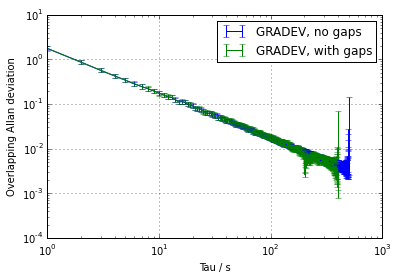

In [6]:
example1()

## White phase noise
Compute the GRADEV of a nonstationary white phase noise.

In [7]:
def example2():
    """
    Compute the GRADEV of a nonstationary white phase noise.
    """
    N=1000 # number of samples
    f = 1 # data samples per second
    s=1+5/N*np.arange(0,N)
    y=s*np.random.randn(1,N)[0,:]
    x = np.linspace(1,len(y),len(y))
    x_ax, y_ax, [err_l, err_h], ns = allantools.gradev(y, rate=f, taus=x)
    plt.loglog(x_ax, y_ax,'b.',label="No gaps")
    y[int(0.4*N):int(0.6*N,)] = np.NaN  # Simulate missing data
    x_ax, y_ax, [err_l, err], ns = allantools.gradev(y, rate=f, taus=x)
    plt.loglog(x_ax, y_ax,'g.',label="With gaps")
    plt.grid()
    plt.legend()
    plt.xlabel('Tau / s')
    plt.ylabel('Overlapping Allan deviation')
    plt.show()

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


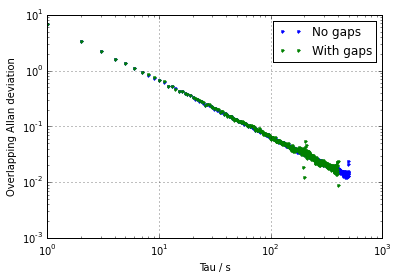

In [8]:
example2()